# Ajuste de parâmetros em modelos de redes neurais

In [29]:
using Plots
using Optim
using Flux

In [2]:
f(x) = 0.2*sin(4*π*x) + 0.3*exp(-x) + 4.0*x^6 - 3.5*x^5
data_x = collect(0:0.05:1)
data_y = f.(data_x)
nothing

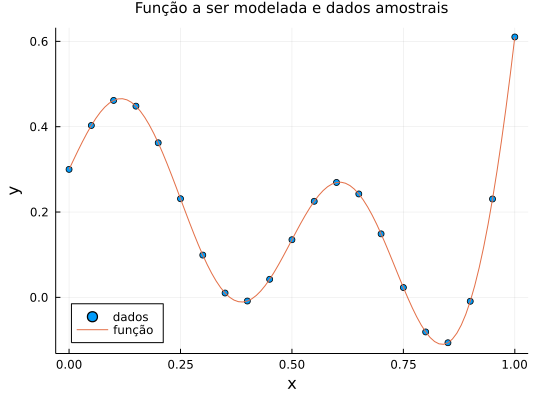

In [3]:
plot(data_x, data_y,
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, f, size=(540,400), label="função")

In [86]:
W1 = [5.0; -5.0; -5.0; -5.0;;]
b1 = [-0.0, -0.0, 0.0, 0.0]
W2 = [5.0 -2.0 5.0 -5.0]
b2 = 0.0
β = [vec(W1); vec(b1); vec(W2); b2]

13-element Vector{Float64}:
  5.0
 -5.0
 -5.0
 -5.0
 -0.0
 -0.0
  0.0
  0.0
  5.0
 -2.0
  5.0
 -5.0
  0.0

In [160]:
function m(x, β)
    W1 = [β[1:4];;]
    b1 = β[5:8]
    W2 = permutedims([β[9:12];;])
    b2 = β[end:end]
    σ(x) = 1 ./ (1 .+ exp.(-x))
    return W2 * σ.(W1 * x .+ b1) .+ b2
end

m (generic function with 1 method)

In [128]:
x = 1
σ(W2 ⋅ σ.(W1 * x + b1) + b2)

0.9929883789851862

In [141]:
m(1, β)


1-element Vector{Float64}:
 4.953150043530006

In [142]:
m([1], β)

1-element Vector{Float64}:
 4.953150043530006

In [159]:
m([1 2 3], β)

1×3 Matrix{Float64}:
 4.95315  4.99968  5.0

In [145]:
m.([1;2;3], Ref(β))

3-element Vector{Matrix{Float64}}:
 [4.953150043530006;;]
 [4.999682214919084;;]
 [4.999997858684411;;]

In [151]:
m(data_x', β)


1×21 Matrix{Float64}:
 1.5  1.93524  2.35722  2.75425  …  4.90155  4.92309  4.93996  4.95315

In [152]:
loss(β, data_x, data_y) = sum(abs2, data_y' - m(data_x', β))

loss (generic function with 1 method)

In [153]:
loss(β, data_x, data_y)

332.26994551159055

In [189]:
res = optimize(β -> loss(β, data_x, data_y), β,  GradientDescent(), Optim.Options(iterations = 50000), autodiff = :forward)

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.490264e-01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.35e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.58e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.32e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.61e-08 ≰ 0.0e+00
    |g(x)|                 = 9.05e-04 ≰ 1.0e-08

 * Work counters
    Seconds run:   4  (vs limit Inf)
    Iterations:    50000
    f(x) calls:    125002
    ∇f(x) calls:   125002


In [190]:
β_optim = Optim.minimizer(res)

13-element Vector{Float64}:
  5.454551526010049
 -5.638713851313843
 -9.090098165087907
 -6.419036411042341
  0.8848412879671522
 -0.7706952701232694
  1.0057506882447982
 -0.5153291321941634
  2.5671944105768447
 -2.1304189708225416
  4.741349508448337
 -5.255036423841777
 -2.3752153146700943

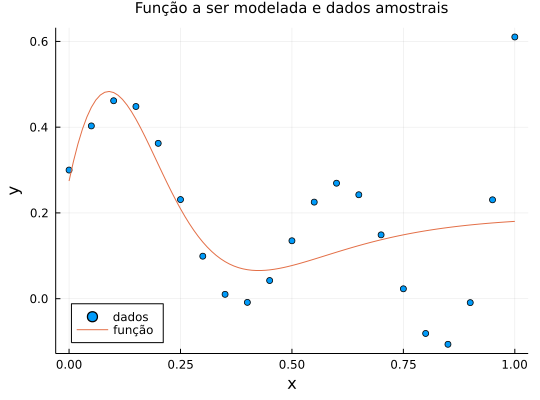

In [191]:
plot(data_x, data_y,
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, x -> first(m(x, β_optim)), size=(540,400), label="função")

In [192]:
res = optimize(β -> loss(β, data_x, data_y), zero(β),  GradientDescent(), Optim.Options(iterations = 50000), autodiff = :forward)

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.606501e-01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 1.39e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.12e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.89e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.71e-07 ≰ 0.0e+00
    |g(x)|                 = 2.12e-03 ≰ 1.0e-08

 * Work counters
    Seconds run:   4  (vs limit Inf)
    Iterations:    50000
    f(x) calls:    125167
    ∇f(x) calls:   125167


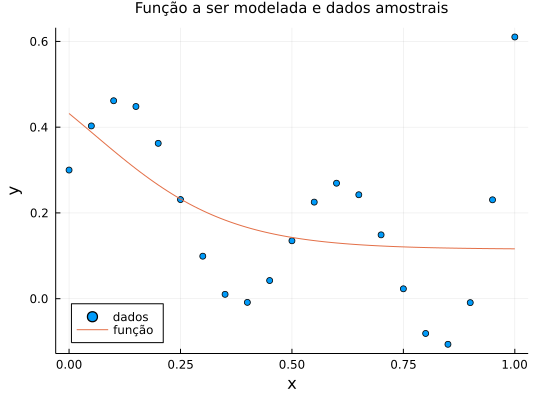

In [193]:
β_optim = Optim.minimizer(res)
plot(data_x, data_y,
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, x -> first(m(x, β_optim)), size=(540,400), label="função")

In [198]:
res = optimize(β -> loss(β, data_x, data_y), zero(β),  NelderMead(), Optim.Options(iterations = 10000))

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.169737e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10000
    f(x) calls:    14040


In [210]:
# β₀ = [10.0;  -9.0;  -6.0;  -8.0;  -5.0;  0.0;  3.0;  10.0;  7.0;  -2.0;  11.0;  -8.0;  0.0]
β₀ = [10.0;  -10.0;  -5.0;  -5.0;  -5.0;  0.0;  5.0;  10.0;  10.0;  -5.0; 10.0;  -5.0;  0.0]
res = optimize(β -> loss(β, data_x, data_y), β₀,  GradientDescent(), Optim.Options(iterations = 10000), autodiff = :forward)

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     2.965339e-03

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.74e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.67e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.37e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.63e-05 ≰ 0.0e+00
    |g(x)|                 = 3.10e-03 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    10000
    f(x) calls:    25160
    ∇f(x) calls:   25160


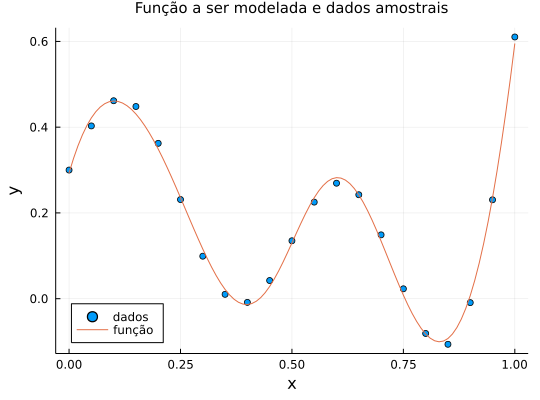

In [212]:
β_optim = Optim.minimizer(res)
plot(data_x, data_y,
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, x -> first(m(x, β_optim)), size=(540,400), label="função")

In [187]:
β_optim = Optim.minimizer(res)

13-element Vector{Float64}:
  -0.038193959228456385
 -38.79936358718514
  18.135085173568125
 -21.72830870733433
  -0.1998425951139173
  19.18578117237649
 -22.550183156085794
 -35.2373426461138
 130.85469561655748
  -0.4630360597212945
  75.07962795332074
 -20.532131681617027
 -57.94428657043078

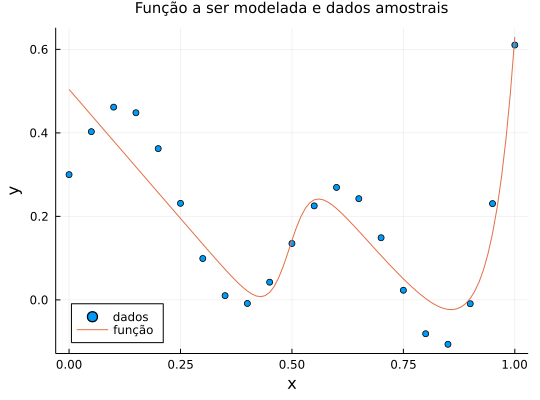

In [188]:
plot(data_x, data_y,
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, x -> first(m(x, β_optim)), size=(540,400), label="função")

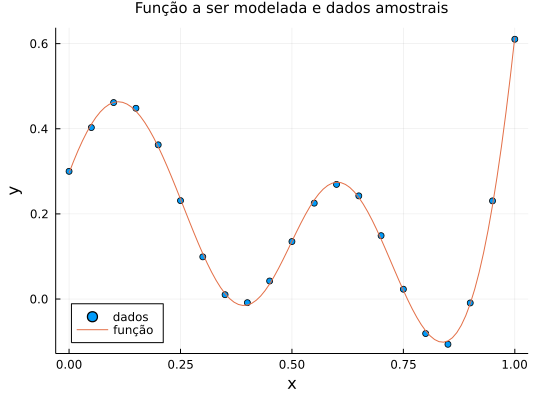

In [166]:
β_flx = [9.503515; -9.3569145; -5.625807; -8.388889; -4.7491217; -0.2195789; 2.8655014; 9.5591955; 7.2226768; -2.3114116; 11.004925; -8.229728; -0.9190517]
plot(data_x, data_y,
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, x -> first(m(x, β_flx)), size=(540,400), label="função")

In [103]:
mf = Chain(Dense(reshape(W1, :, 1), b1, σ), Dense(reshape(W2, 1, :), [b2]))

Chain(
  Dense(1 => 4, σ),                     # 8 parameters
  Dense(4 => 1),                        # 5 parameters
)                   # Total: 4 arrays, 13 parameters, 360 bytes.

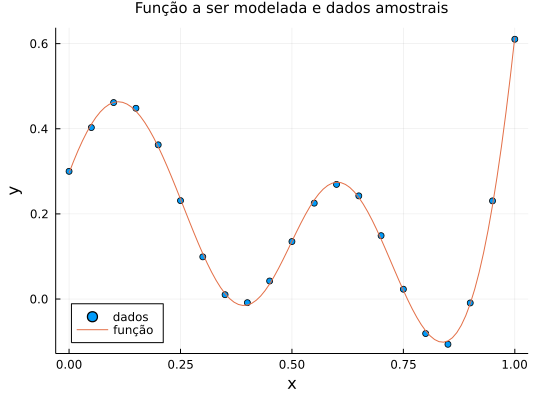

In [163]:
mf = Chain(Dense(reshape(β_flx[1:4], :, 1), β_flx[5:8], σ), Dense(reshape(β_flx[9:12], 1, :), β_flx[end:end]))
plot(data_x, data_y,
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, x -> mf([x])[1], size=(540,400), label="função")

In [164]:
mf([1])


1-element Vector{Float64}:
 0.6157228257632166